# Network Notes

In [122]:
# good 160 unit *3 network
network_model = "func-27-1-10"
iter1 = 1500
iter2 = 1600
codec = 3200
model_type = 'functional'

output_fn_postfix1 = "output_" + str(0) + "_" + str(iter1)
output_fn_postfix1_mid = "output_" + str(1) + "_" + str(iter1)

output_fn_postfix2 = "output_" + str(0) + "_" + str(iter2)
output_fn_postfix2_mid = "output_" + str(1) + "_" + str(iter2)


from subprocess import check_output, call

import os
import json

home = os.environ.get('HOME')
if codec==3200:
    codec_sub = '-3200'
else:
    codec_sub = ''

os.chdir(home + "/store/c2gen/notebooks")


cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1_mid)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

import network_data as nd
from IPython.display import display, Markdown, Audio, Image
nh = home + "/store/c2gen/out/"+network_model+"/log"
    
if os.path.isfile(nh):
  with open(nh) as f:
      res = f.readlines()
      print(str.join("",res[-12:]))

  try:
    res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup/"+network_model+".out"])
  except:
    try:
      res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup-"+network_model+".out"])
    except:
      res = ''
  if res != '':  
    res = str(res).replace('\\n', "\n")
    res = str(res).replace('\\r', "\n")
    res = str(res).replace('\\x08', "")
    res = res.split("\n")[-1]
    print(res)



Training Iteration 2733 
using full set of frames 
generating encoded output 
Training Iteration 2734 
using full set of frames 
generating encoded output 
Training Iteration 2735 
using full set of frames 
generating encoded output 
Training Iteration 2736 
using full set of frames 
generating encoded output 

b'============>....] - ETA: 1s - loss: 0.8303 - model_2_loss_1: 1.8134 - model_2_loss_2: 1.0733 - generator_TD_Dense_0_loss: 0.0958 - model_1_loss: 0.2653'


In [123]:
with open(home + "/store/c2gen/out/"+network_model+"/config.json") as f:
    j = json.load(f)
    for k,v in j.items():
        print(k,": ",v) 


start_iteration :  2730
num_iterations :  15000
fit_batch_size :  5
learn_next_step :  False
gen_every_nth :  10
generate_num_outputs :  2
save_model_every_nth :  10
framelen :  13
frame_seq_len :  100
overlap_sequence :  1
seed_seq_len :  100
seed_start_index :  60
seq_step :  98
test_data_fn :  ./test/critiquepracticalreason_00_kant_64kb.c2cb-3200
frame_prop_orig_scale :  [1, 127, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31]
frame_prop_loss_scale :  [1, 127, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31]
stateful :  False
shuffle :  False
limit_frames :  0
optimizer :  {'name': 'Nadam', 'params': {}}
generate_len :  200
model_filename :  out/func-27-1-10/model-2730.h5
frame_len_ms :  20


In [124]:
try:
  with open(home + "/store/c2gen/out/" + network_model + '/notes.md', 'r') as fh:
    display(Markdown(fh.read()))
    
except:
    print("no markdown file found")

# func-27-1-10 Notes

2017-12-17 19:40:57

Run with arguments ./test/critiquepracticalreason_00_kant_64kb.c2cb-3200 

## Description

Removed softmax from last run


In [125]:
if model_type != 'functional':
  nd.model_config(network_model)

Columns: ['epoch', 'generator_TD_Dense_0_loss', 'loss', 'model_1_loss', 'model_2_loss_1', 'model_2_loss_2']


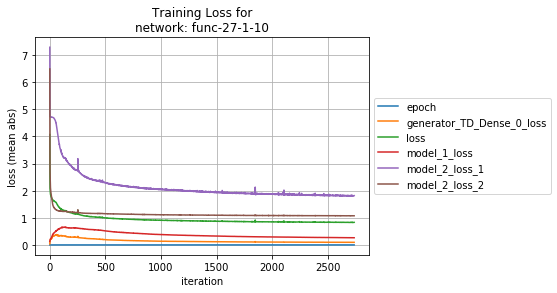

In [126]:
nd.plot_training_loss(network_model, 'mean abs') #, columns=['generator_TD_Dense_0_loss', 'model_2_loss_2'], weights=[100,1]) 

In [127]:
with open(home + "/store/c2gen/out/"+network_model+"/training.log") as f:
    rl = f.readlines()
    print(str.join("",rl[0:1]))
    print(str.join("",rl[-10:]))
    

with open(home + "/store/c2gen/out/"+network_model+"/gen_counter") as f:
    latest_iter = (int(f.readlines()[0]))
    print(latest_iter)
    

epoch,generator_TD_Dense_0_loss,loss,model_1_loss,model_2_loss_1,model_2_loss_2

0,0.0968488574602,0.829618394286,0.266928422192,1.80731071581,1.07354173915
0,0.096390181803,0.831743616711,0.265223054284,1.81519388574,1.07537188559
0,0.0964261840458,0.830486009442,0.26520038985,1.81113754683,1.07422003498
0,0.0959835791812,0.830179084479,0.265205346396,1.80969451238,1.07461684444
0,0.0957974958234,0.828570797221,0.26537808976,1.80581707862,1.07272092686
0,0.0955208635307,0.828262270103,0.26513094624,1.80245439631,1.07390758214
0,0.095751146329,0.828981720269,0.265064990027,1.80614746231,1.07362939191
0,0.0960988053147,0.830097716698,0.265330006374,1.80872124167,1.07478483417
0,0.0957266121224,0.829872174294,0.265516885107,1.80815862749,1.07487447869
0,0.0957548394982,0.831745234437,0.264588713353,1.81744072441,1.07488785296

2730


Latest Iteration: 2730
3200 rate codec



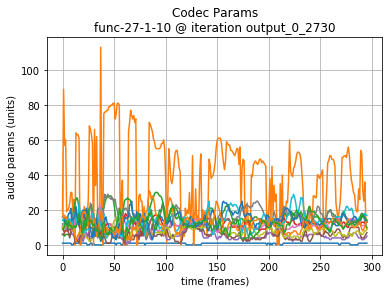

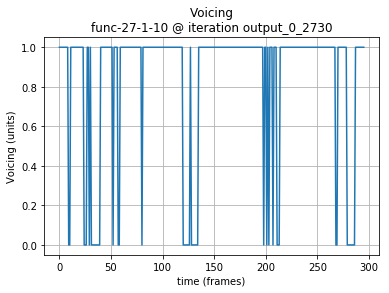

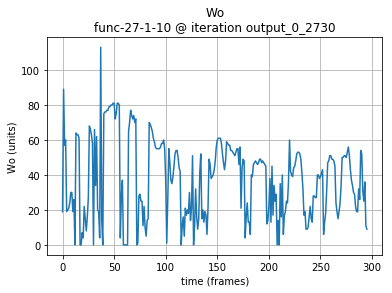

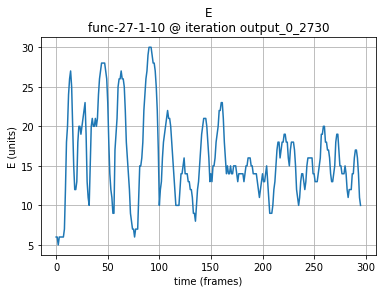

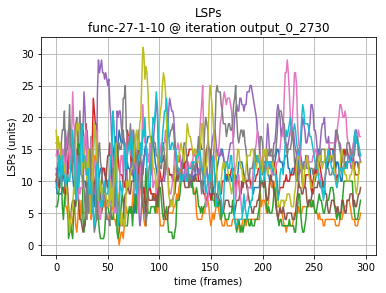

In [128]:
try:
  print("Latest Iteration:", latest_iter)
  
  output_fn_postfix = "output_" + str(0) + "_" + str(latest_iter)
  output_fn_postfix_mid = "output_" + str(1) + "_" + str(latest_iter)
  
  chart_postfix = output_fn_postfix

  nd.plot_codec_params(network_model,chart_postfix, scale_up='orig')
  nd.plot_spec_params(network_model,chart_postfix, params='Voicing')
  nd.plot_spec_params(network_model,chart_postfix, params='Wo')
  nd.plot_spec_params(network_model,chart_postfix, params='E')
  nd.plot_spec_params(network_model,chart_postfix, params='LSPs')
except FileNotFoundError:
    print("File not found")

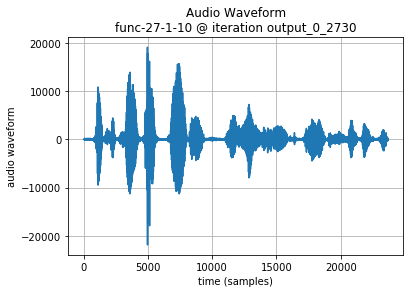

In [129]:
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

try:
  nd.plot_audio_waveform(network_model, output_fn_postfix)
  display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix)+codec_sub+".wav"))
except FileNotFoundError:
  print("file not found")
print()

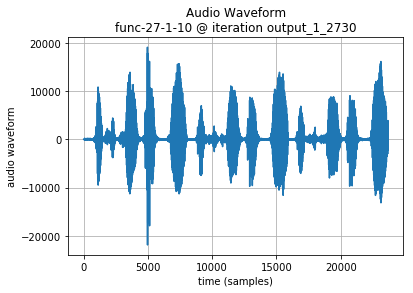

In [130]:
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix_mid)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

try:
  nd.plot_audio_waveform(network_model, output_fn_postfix_mid)
  display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix_mid)+codec_sub+".wav"))
except FileNotFoundError:
  print("file not found")
print()

Early Iterations
===

output_0_1500
3200 rate codec



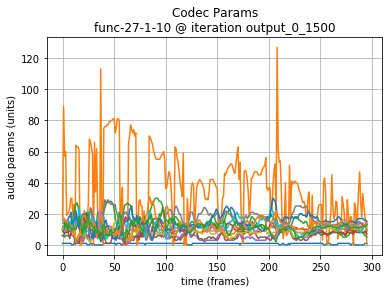

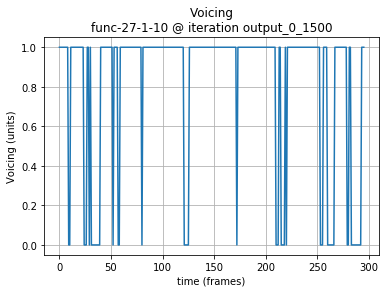

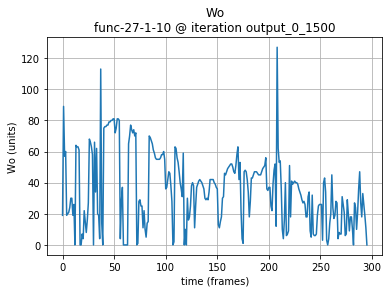

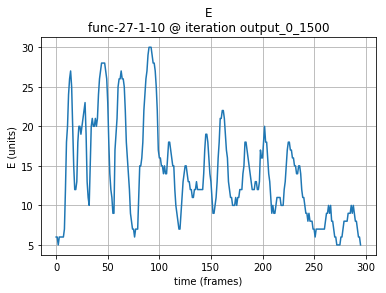

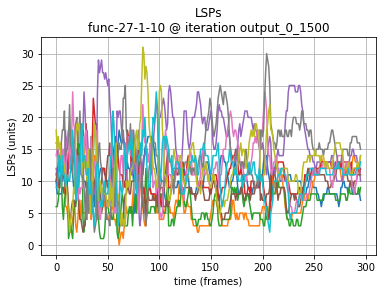

In [131]:
print(output_fn_postfix1)
nd.plot_codec_params(network_model,output_fn_postfix1, scale_up='orig')
nd.plot_spec_params(network_model,output_fn_postfix1, params='Voicing')
nd.plot_spec_params(network_model,output_fn_postfix1, params='Wo')
nd.plot_spec_params(network_model,output_fn_postfix1, params='E')
nd.plot_spec_params(network_model,output_fn_postfix1, params='LSPs')

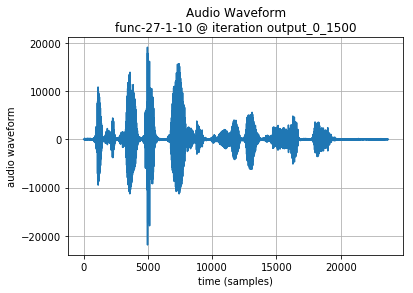

In [132]:
nd.plot_audio_waveform(network_model, output_fn_postfix1)

Listen to the WAV file

In [133]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1)+codec_sub+".wav"))

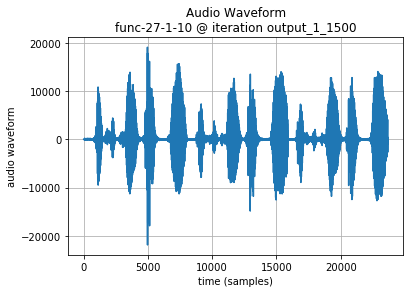

In [134]:
nd.plot_audio_waveform(network_model, output_fn_postfix1_mid)

In [135]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1_mid)+codec_sub+".wav"))

Later Iterations
===

3200 rate codec



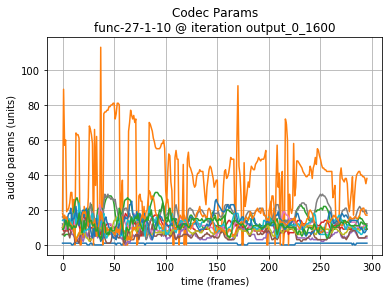

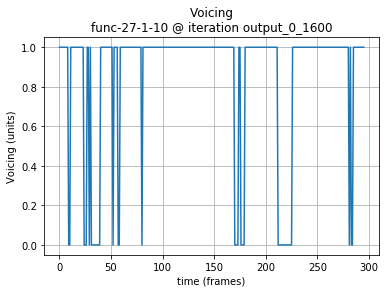

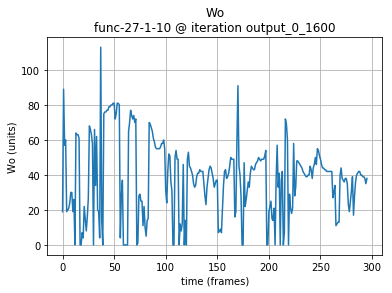

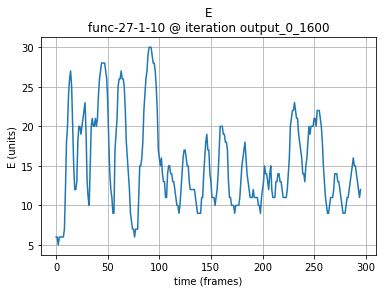

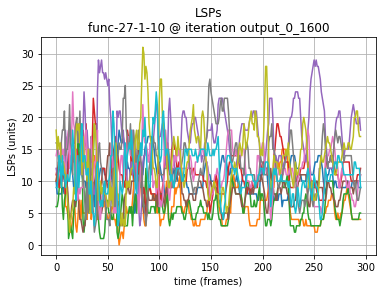

In [136]:
nd.plot_codec_params(network_model,output_fn_postfix2, scale_up=True)
nd.plot_spec_params(network_model,output_fn_postfix2, params='Voicing')
nd.plot_spec_params(network_model,output_fn_postfix2, params='Wo')
nd.plot_spec_params(network_model,output_fn_postfix2, params='E')
nd.plot_spec_params(network_model,output_fn_postfix2, params='LSPs')

In [137]:
nd.plot_audio_waveform(network_model, output_fn_postfix2)

FileNotFoundError: [Errno 2] No such file or directory: '/home/phil/store/c2gen/out/func-27-1-10/out-c2cb-output_0_1600-3200.raw'

Listen to the WAV file

In [ ]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix2)+codec_sub+".wav"))

## 